# Binary Prediction of Poisonous Mushrooms
- https://www.kaggle.com/competitions/playground-series-s4e8
- But  : prédire si un champignon est toxique ou non en fonction de ses différentes caractéristiques

# Plan : 
## 1 Découverte du jeu de données
- Dimensions des données
- Features signification
- Target 

## 2. imputation des données
- Colonnes avec peu de NaN
- Colonnes avec beaucoup de NaN
- Colonne avec un nombre de NaN modéré

## 3. Visualisation des données
- Analyse univariée
- Analyse bivariée : target Vs features

## 4. test statistiques
- Target VS continue
- Target vs qualitative
## 5. Preprocessing
## 6. Modelisation

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from termcolor import colored

from scipy.stats import chi2_contingency, kruskal, pearsonr, shapiro, levene, mannwhitneyu, spearmanr

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import pickle
import os
import warnings

warnings.filterwarnings("ignore")

# 1. Découverte du jeu de données

In [52]:
train = pd.read_csv(r"D:\Etude_Data_science\Kaggle_competition\10_Binary_Prediction_of_Poisonous_Mushrooms\dataset\train.csv")
test =  pd.read_csv(r"D:\Etude_Data_science\Kaggle_competition\10_Binary_Prediction_of_Poisonous_Mushrooms\dataset\test.csv")


In [53]:
df = train.copy()

In [54]:
pd.set_option("display.max_columns",None)

In [55]:
print(df.shape)
df.head()

(3116945, 22)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

### Feature signification : 
#### English
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. does-br uise-or-bleed :   bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



#### French :

     1. forme du chapeau : cloche=b, conique=c, convexe=x, plat=f, noueux=k, creux=s
     2. surface de la calotte : fibreuse=f, rainurée=g, écailleuse=y, lisse=s
     3. couleur de la coiffe : brun=n, chamois=b, cannelle=c, gris=g, vert=r, rose=p, violet=u, rouge=e, blanc=w, jaune=y
     4. ecchymoses? : ecchymoses=t,no=f
     5. odeur : amande=a, anis=l, créosote=c, poisson=y, fétide=f, moisi=m, aucune=n, piquant=p, épicé=s
     6. attachement de l'or : attaché=a, descendant=d, libre=f, cranté=n
     7. espacement de l'ouïe : proche=c, serré=w, éloigné=d
     8. taille de la branchie : large=b, étroite=n
     9. couleur des branchies : noir=k, brun=n, chamois=b, chocolat=h, gris=g, vert=r, orange=o, rose=p, violet=u, rouge=e, blanc=w, jaune=y
    10. forme de la tige : élargie=e, effilée=t
    11. tige-racine : bulbeuse=b, massue=c, cupule=u, égale=e, rhizomorphe=z, enracinée=r, manquante= ?
    12. surface du pédoncule au-dessus de l'anneau : fibreux=f, écailleux=y, soyeux=k, lisse=s
    13. surface du pédoncule au-dessous de l'anneau : fibreux=f,écailleux=y,soyeux=k,lisse=s
    14. couleur du pédoncule au-dessus de l'anneau : brun=n, chamois=b, cannelle=c, gris=g, orange=o, rose=p, rouge=e, blanc=w, jaune=y
    15. couleur du pédoncule au-dessous de l'anneau : brun=n, chamois=b, cannelle=c, gris=g, orange=o, rose=p, rouge=e, blanc=w, jaune=y
    16. type de voile : partiel=p,universel=u
    17. couleur du voile : brun=n,orange=o,blanc=w,jaune=y
        18. numéro de l'anneau : none=n,one=o,two=t
    19. type d'anneau : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    20. couleur de l'empreinte des spores : noir=k, brun=n, chamois=b, chocolat=h, vert=r, orange=o, violet=u, blanc=w, jaune=y
    21. population : abondante=a, groupée=c, nombreuse=n, dispersée=s, plusieurs=v, solitaire=y
    22. habitat : herbes=g, feuilles=l, prairies=m, chemins=p, urbain=u, déchets=w, bois=d

#### Target : Class

In [57]:
pie_target = df["class"].value_counts(normalize=True)*100

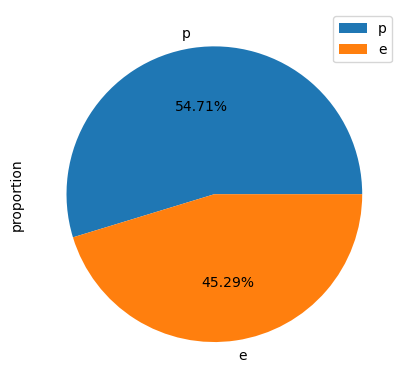

In [58]:
pie_target.plot(kind="pie", legend=True, autopct='%1.2f%%')
plt.show()

Données de la targt plutôt équilibrée

In [59]:
df.isnull().mean()*100

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

Présence de données manquantes 

# 2. Imputation des données :


In [60]:
df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False)

veil-type               0.948843
spore-print-color       0.914255
stem-root               0.884527
veil-color              0.879370
stem-surface            0.635514
gill-spacing            0.403740
cap-surface             0.215282
gill-attachment         0.168093
ring-type               0.041348
gill-color              0.000018
habitat                 0.000014
cap-shape               0.000013
stem-color              0.000012
has-ring                0.000008
cap-color               0.000004
does-bruise-or-bleed    0.000003
cap-diameter            0.000001
dtype: float64

Les colonnes > 50% de NaN on peut les supprimer car il y a trop de données manquantes

In [61]:
high_nan = df.isnull().mean()[df.isnull().mean()>.5].sort_values(ascending=False).index.tolist()

In [62]:
df.drop(high_nan, axis = 1, inplace=True)

Les NaN restant, on va appliquer de l'imputation des données : 

In [63]:
df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False)

gill-spacing            0.403740
cap-surface             0.215282
gill-attachment         0.168093
ring-type               0.041348
gill-color              0.000018
habitat                 0.000014
cap-shape               0.000013
stem-color              0.000012
has-ring                0.000008
cap-color               0.000004
does-bruise-or-bleed    0.000003
cap-diameter            0.000001
dtype: float64

In [64]:
mid_nan = df.isnull().mean()[df.isnull().mean()>0].index.tolist()

In [65]:
df[mid_nan].nunique()

cap-diameter            3913
cap-shape                 74
cap-surface               83
cap-color                 78
does-bruise-or-bleed      26
gill-attachment           78
gill-spacing              48
gill-color                63
stem-color                59
has-ring                  23
ring-type                 40
habitat                   52
dtype: int64

In [ ]:
pd.set_option("display.max_rows",None)
for i in mid_nan:
    print(colored(i, "red",attrs=["bold"]))
    print(df[i].value_counts(normalize=True)*100)

In [ ]:
pd.set_option("display.max_rows",10)

- On constate qu'il y a enormement de valeurs différentes, certaines modalité n'ont pas vraiment de sens ?
- Certaines valeurs sont  numériques, d'autres textuelles
- beaucoup de modalité sous représentée (<1%) 



In [ ]:
plt.figure(figsize=(16,8))
for i,col in enumerate(mid_nan[1:],1):
    plt.subplot(4,3,i)
    sns.countplot(y = col, data = df.sample(100000, random_state = 42))
plt.show()

Moyenne : 6.309848357732786
Mediane  : 5.75
Mode  : 1.49


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

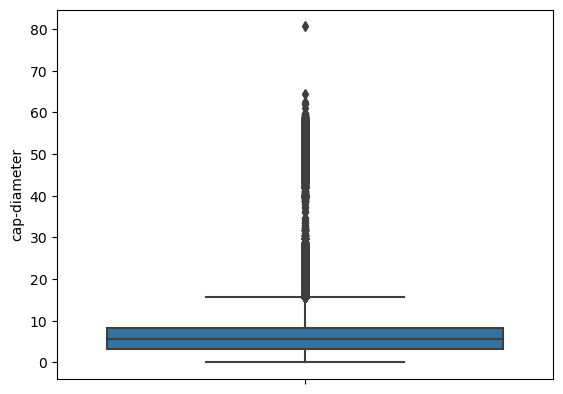

In [33]:
print("Moyenne :", df["cap-diameter"].mean())
print("Mediane  :", df["cap-diameter"].median())
print("Mode  :", df["cap-diameter"].mode()[0])
sns.boxplot(y = df["cap-diameter"])
plt.show()


- beaucoup de modalité sont clairement sous représenté
- beaucoup d'outliers pour cap-diameter, on va imputer par **la médiane**

In [66]:
imputer_mode = SimpleImputer(strategy="most_frequent")
mode_col =  [i for i in mid_nan if i!="cap-diameter"]
df[mode_col] = imputer_mode.fit_transform(df[mode_col])
df[mode_col].isnull().mean()

cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
dtype: float64

In [67]:
#pour cap-diameter
imputer_mediane = SimpleImputer(strategy="median")
df["cap-diameter"] = imputer_mediane.fit_transform(df[["cap-diameter"]])

## Nettoyage des modalités 
- Nous allons, pour chaque colonnes, **regrouper** toutes les modalités mineur en un seul terme afin de faciliter l'analyse des données

In [68]:
var_qual = df.select_dtypes(include="object").columns.tolist()

In [ ]:
for i in var_qual:
    print(colored(i, "blue",attrs=["bold"]))
    print(df[i].unique())
    print(colored("nunique :", "green", attrs=["bold"]),colored(df[i].nunique(), "green", attrs=["bold"]))
    print()

- Au vu des modalités pour chaque variable catégorique ici, **seule 2 variables présentent très peu de modalités : class (= la target, 2)  et season (4)**
- Donc pour toutes les variables > 4 modalités, nous allons **réduire le nombre de modalité**

In [69]:
col_reduction_mode = [i for i in  df if df[i].dtype == "object"  and df[i].nunique()>4] #récupération des colonnes ayant trop de modalitées
col_reduction_mode

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat']

In [70]:
#Création d'un dictionnaire qui contiendra le nom des colonne et les modalités les moins présentent du jeu de données (<10%)
dict_extra_modality = {}
for i in col_reduction_mode:
    dict_extra_modality[i] = (df[i].value_counts(normalize=True))[df[i].value_counts(normalize=True)*100<10].index.tolist()

In [ ]:
#serealisation du dictionnaire : 
with open("dict_extra_modality.pkl", "wb") as f:
    pickle.dump(dict_extra_modality,f)

In [ ]:
[(i,dict_extra_modality[i][:5]) for i in dict_extra_modality]

In [72]:
#Réduction du nombre de modalité :

for i in dict_extra_modality:
    print(df[i].value_counts(normalize=True)*100) # affichage avant réduction modalité
    df[i] = df[i].apply(lambda x:x if x not in dict_extra_modality[i] else "other")
    print(df[i].value_counts(normalize=True)*100) #après réduction modalité
    print()

cap-shape
x        46.072869
f        21.695538
s        11.714868
other    10.293701
b        10.223023
Name: proportion, dtype: float64
cap-shape
x        46.072869
f        21.695538
s        11.714868
other    10.293701
b        10.223023
Name: proportion, dtype: float64

cap-surface
t        36.311196
s        12.350876
y        10.517542
h         9.126244
g         8.461137
           ...    
1.42      0.000032
has h     0.000032
10.83     0.000032
8.96      0.000032
0.87      0.000032
Name: proportion, Length: 83, dtype: float64
cap-surface
other    40.820387
t        36.311196
s        12.350876
y        10.517542
Name: proportion, dtype: float64

cap-color
n             43.618158
y             12.404037
w             12.173522
g              6.763834
e              6.329595
                ...    
3.95           0.000032
6.59           0.000032
5.25           0.000032
veil-color     0.000032
9.02           0.000032
Name: proportion, Length: 78, dtype: float64
cap-color
n     

habitat
d        69.863857
other    15.541468
g        14.594675
Name: proportion, dtype: float64



### datavisualisation
* univariée
- bivariée
### test statistique

# 3. Visualisation des données 
## Analyse univariée 

In [73]:
var_cont = [i for i in df.select_dtypes(include="float")]

### Variable continues :
#### Visualisation + test shapiro (normalité)

In [ ]:
def visualisation_plot(columns, nrow,ncol):
    plt.figure(figsize=(22,5))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.histplot(x=column,data=df,kde=True,color="orange")
        ax.axvline(df[column].mean(), c = "red", label = "Moyenne")
        ax.axvline(df[column].median(), c = "yellow", label = "Mediane")
        ax.legend()

    plt.show()

In [ ]:
def shapiro_test(list_col):
    """
    Cette fonction teste si list_col est une liste, si ce n'est pas le cas,
    elle convertie le texte en une liste avant de faire un test shapiro pour vérifier
    si la feature suit une loi normale ou non
    """
    if type(list_col) != list:
        list_col = [list_col]

    accepted,rejected = [], []

    for col in df[list_col]:
        stat, p_value = shapiro(df[col])  
        alpha = 0.05
        if p_value > alpha: 
            result = colored('Accepter', 'green')  
            accepted.append(col)
            print(f'{col:-<50}\t Hypothèse: {result}')
        else:
            result = colored('Rejet','red')        
            rejected.append(col)
            print(f'{col:-<50}\t Hypothèse: {result}')
    return accepted,rejected

In [ ]:
visualisation_plot(var_cont,1,3)

In [ ]:
acc,rej = shapiro_test(var_cont)

In [ ]:
plt.figure(figsize=(22,5))
for i, column in enumerate(list(df[var_cont].columns), 1):
    plt.subplot(1,3,i)
    sns.boxplot(data=df[var_cont],x=column)

### Variable qualitative (discrète) :

In [ ]:
def discret_plot_viz(columns,nrow,ncol):
    plt.figure(figsize=(22,10))
    for i, column in enumerate(list(df[columns].columns), 1):
        plt.subplot(nrow,ncol,i)
        ax=sns.countplot(y=column,data=df, )
    plt.tight_layout
    plt.show()

In [ ]:
discret_plot_viz(var_qual,4,4)

### Target : 

In [ ]:
pie_target.plot(kind="pie", legend=True, autopct='%1.2f%%')
plt.show()

## Analyse  bivariée : 
#### Target Vs variables continues

In [ ]:
def boxplot2(columns,nrow,ncol):
    plt.figure(figsize=(18,5))
    for i,col in enumerate(columns,1):
        plt.subplot(nrow,ncol,i)
        sns.boxplot(x=df["class"], y = col, data = df[var_cont])

In [ ]:
boxplot2(var_cont,1,3)

In [ ]:
def barplot2(feat,target, stacked=False):
    """
    Fonction permettant d'obtenir un barplot en fonction de 2 variables
    La normalisation se fait en fonction de la variable 'target'
    """
    # Calculer les comptages groupés
    grouped_counts = df.groupby([target,feat]).size().unstack()

    # Normalisation par "target"
    total_by_gender = grouped_counts.sum(axis=1)
    normalized_by_gender = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

    #  graphique en barres empilées normalisé par la target
    ax1 = normalized_by_gender.plot(kind="bar", stacked=stacked)
    ax1.set_ylabel(f'Pourcentage (%) - Normalisé par {target}')
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%')
    plt.tight_layout()
    plt.title(f'Normalisation par {target}')
    plt.show()

In [ ]:
def barplot2(feat,target, stacked=False):
    """
    Fonction permettant d'obtenir un barplot en fonction de 2 variables
    La normalisation se fait en fonction de la variable 'target'
    
    ON PEUT NORMALISER PAR LA FEATURE EN INVERSANT DANS LES PARAMETRES "feat" & "target"
    
    """
    # Calculer les comptages groupés
    grouped_counts = df.groupby([target,feat]).size().unstack()

    # Normalisation par "target"
    total_by_gender = grouped_counts.sum(axis=1)
    normalized_by_gender = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

    #  graphique en barres empilées normalisé par la target
    ax1 = normalized_by_gender.plot(kind="bar", stacked=stacked)
    ax1.set_ylabel(f'Pourcentage (%) - Normalisé par {target}')
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%')
    plt.tight_layout()
    plt.title(f'Normalisation par {target}')
    plt.show()

In [ ]:
for i in var_qual:
    if (i !="class"):
        barplot2(i,"class")

In [ ]:
# Inversons feature et target pour avoir la normalisation en fonction des features :
for i in var_qual:
    if (i !="class"):
        barplot2("class",i) #on a inverser ici le code


## 4. Test statistiques 
### Target VS qualitative


In [ ]:
def khi2(features, target):
    """
    Fonction permettant l'application d'un test de chi2 de contingence entre 2 variables qualitatives (ou discrètes)
    features : liste ou str 
    target : str
    renvoi un tuple de liste, le premier élément du tuple sont les variables à conserver, le second les variables à
    supprimer
"""
    #Listes qui contiendra les variables triées après le test statistique
    var_a_supprimer = []
    var_a_conserver = []
    
    #Si la features entrée est au format str on la transforme en liste :
    if type(features)!=list:
        features = [features]
    print(colored("P-values :\n","magenta",attrs=["bold"]))
    
    for feature in features :
        alpha = 0.05
        df_temp = pd.crosstab(df[target], df[feature])
        pval = chi2_contingency(df_temp)[1] #récupération uniquement de la pvalue
        
        if pval<alpha:
            var_a_conserver.append(feature) #On rejette l'hypothèse H0 
            #(H0 = pas de différence entre les population) au risque de 5% de se tromper
            print(f"{colored(feature,'green',attrs=['bold'])} : {pval}")
        else:
            var_a_supprimer.append(feature) #on ne rejette pas H0, 
            #et donc on conclu qu'il n'y a pas de différence significative entre les population
            print(f"{colored(feature,'light_red', attrs=['bold'])} : {pval}")
    print()
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
      
    return var_a_conserver,var_a_supprimer

In [ ]:
khi2(var_cont,"class")

### Target vs continue
**Test de Man Withney**

Nous appliquons ce test statistique est car aucune des variables continues **ne suit de loi normal** et notre **target** ne prend que **2 modalité**

In [ ]:
def manwithney(features, target,dataframe):
    var_a_conserver, var_a_supprimer = [],[]
    """
    Fonction qui effectue un test de Man Withney entre une variable qualitative et une variable continue
    features : liste ou str 
    target : str
    dataframe : jeu de donnée contenant les features et la target
    renvoi un tuple de liste, le premier élément du tuple sont les variables à conserver, le second les variables à
    supprimer
    """
    if type(features) == str:
        features = [features]
    print(colored("P-values :","blue")) 
    print()
    for feat in features:
        stat, pval = mannwhitneyu(dataframe[feat],dataframe[target]) #test man withney
        alpha = 0.05
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    return var_a_conserver, var_a_supprimer
        

In [74]:
# Encodage de la target afin de pouvoir effectuer le test man whitney
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df["class"])

In [75]:
df["target_encoded"] = target_encoded

In [76]:
print("Classe initiale :", encoder.classes_)
print("Classe transformées :", encoder.transform(encoder.classes_))


Classe initiale : ['e' 'p']
Classe transformées : [0 1]


In [ ]:
var_cont_cons, var_cont_suppr = manwithney(var_cont, "target_encoded", df)

Le test nous montre qu'on doit conserver toutes les variables

In [77]:
#Nous pouvons retirer la target encodée de df :
df.drop(columns="target_encoded", axis = 1, inplace = True)

# 5. Preprocessing
- Encodage et normalisation des données

In [78]:
X = df.drop("class",axis = 1 )
y = df["class"]

In [79]:
var_qual.remove("class")

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size=0.2)

##### Normalisation : 

In [81]:
scaler = StandardScaler()
scaler.fit(X_train[var_cont])
X[var_cont] = scaler.transform(X[var_cont])

### Encodage : 
#### Features :

In [82]:
# Encodage ordinal (Label Encoding)
feature_encoders = {}
for column in var_qual:
    feature_encoders[column] = LabelEncoder()
    feature_encoders[column].fit(X_train[column].astype(str))
    X[column] = feature_encoders[column].transform(X[column])

print(feature_encoders)
X[var_qual].head()


{'cap-shape': LabelEncoder(), 'cap-surface': LabelEncoder(), 'cap-color': LabelEncoder(), 'does-bruise-or-bleed': LabelEncoder(), 'gill-attachment': LabelEncoder(), 'gill-spacing': LabelEncoder(), 'gill-color': LabelEncoder(), 'stem-color': LabelEncoder(), 'has-ring': LabelEncoder(), 'ring-type': LabelEncoder(), 'habitat': LabelEncoder(), 'season': LabelEncoder()}


,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,1,1,1,0,0,0,3,2,0,0,0,0
1,4,0,1,0,0,0,0,1,2,1,0,3
2,1,1,1,0,3,0,3,0,0,0,2,3
3,1,3,1,0,2,0,1,2,0,0,0,2
4,4,0,2,0,1,0,3,2,0,0,1,0


#### Encodage Target : 

In [89]:
label_encoders = LabelEncoder()
label_encoders.fit(y_train)

LabelEncoder()

In [ ]:
label_encoders = LabelEncoder()
label_encoders.fit(y_train)

y_index = y.index #On conserve l'index sinon la transformation ci-dessous vas le réinitialiser
#et cela nous empêchera de faire la concaténation [X,y] correctement

#Ce soucis d'index vien du fait que lors de l'imputation des données nous avons supprimer certaines lignes, donc il manque des index

y = pd.DataFrame(label_encoders.transform(y), columns=["class"],index=y_index)

# Serialisation des données : 

In [97]:
# Enregistrement StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler,f)
#Enregistrement Features encoder 
with open("feature_encoders.pkl", "wb") as f:
    pickle.dump(feature_encoders,f)

#Enregistrement Label Encoder :
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders,f)

#Enregistrement Imputer  :
with open("imputer_mediane.pkl", "wb") as f:
    pickle.dump(imputer_mediane,f)
with open("imputer_mode.pkl", "wb") as f:
    pickle.dump(imputer_mode,f)


    
    
print(f'{colored("Enregistrement de :","blue")} {colored(imputer_mediane,"green")}')
print(f'{colored("Enregistrement de :","blue")} {colored(imputer_mode,"green")}')      
print(f'{colored("Enregistrement de :","blue")} {colored(scaler,"green")}')
print(f'{colored("Enregistrement de :","blue")} {colored("feature_encoders","green")}')
print(f'{colored("Enregistrement de :","blue")} {colored(label_encoders,"green")}')


Enregistrement de : SimpleImputer(strategy='median')
Enregistrement de : SimpleImputer(strategy='most_frequent')
Enregistrement de : StandardScaler()
Enregistrement de : feature_encoders
Enregistrement de : LabelEncoder()


# Enregistrement du dataframe preprocessed : 

In [98]:
df_preprocessed = pd.concat([X,y],axis = 1)
df_preprocessed

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,0,0.534797,1,1,1,0,0,0,3,-0.680893,0.523513,2,0,0,0,0,0
1,1,-0.386386,4,0,1,0,0,0,0,-0.577198,-0.577326,1,2,1,0,3,1
2,2,0.135403,1,1,1,0,3,0,3,0.185705,-0.151075,0,0,0,2,3,0
3,3,-0.521664,1,3,1,0,2,0,1,-0.810513,-0.571148,2,0,0,0,2,0
4,4,-0.098651,4,0,2,0,1,0,3,-1.103082,-0.345050,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,0.640013,1,2,0,2,0,0,3,2.144810,0.946057,2,2,1,0,2,0
3116941,3116941,0.981431,3,2,2,2,1,0,2,0.111637,1.954232,2,0,0,0,2,0
3116942,3116942,0.324363,4,0,1,0,0,0,3,1.170813,-0.011463,3,2,1,0,0,1
3116943,3116943,0.674370,2,0,0,2,2,0,2,1.030083,0.817564,2,2,1,0,2,0


In [99]:
df_preprocessed.to_csv("df_preprocessed.csv")

# Prochaine étape : Modelisation !